# Welcome to Reinforcement Learning for Robotics

This site is designed for interactive learning in the course "Reinforcement Learning for Robotics"

You'll find:
- Live Python code cells
- Embedded videos and images
- Step-by-step RL examples


## Note
When you want to try the codes yourself, simply click on the rocket icon above and select Live Code so you can change and run the code. To start, try to edit the following code cell and run it to make sure everything works fine on your end.

Note that the first time you try to run a code, it may take some time, but the next time, you'll be fine. 

In [1]:
print("Hello, write whatever you want here (first, you need to click on the rocket icon above!!)")

Hello, write whatever you want here (first, you need to click on the rocket icon above!!)


Now, let's see a code for 10-arm bandit problem with some explanations:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 10            # number of arms
steps = 1000      # number of steps per run
runs = 500        # keep small for speed in Thebe
epsilon = 0.1     # epsilon-greedy

# Track rewards and optimal actions
all_rewards = np.zeros((runs, steps))
optimal_action_counts = np.zeros((runs, steps))

# Simulation
for run in range(runs):
    q_star = np.random.normal(0, 1, k)
    optimal_action = np.argmax(q_star)
    
    Q = np.zeros(k)
    N = np.zeros(k)
    
    for t in range(steps):
        if np.random.rand() < epsilon:
            action = np.random.randint(k)
        else:
            action = np.argmax(Q)

        reward = np.random.normal(q_star[action], 1)
        all_rewards[run, t] = reward
        
        if action == optimal_action:
            optimal_action_counts[run, t] = 1
        
        N[action] += 1
        alpha = 1 / N[action]
        Q[action] += alpha * (reward - Q[action])

# Results
avg_rewards = all_rewards.mean(axis=0)
optimal_action_percent = optimal_action_counts.mean(axis=0) * 100

# Output final Q estimates and optimal action
print("Final estimated Q-values:", Q)
print("True action values (q*):", q_star)
print("Final selected action:", np.argmax(Q))

Final estimated Q-values: [ 0.57989797  0.84921863  0.7484008  -0.4060106   0.87562159 -0.45067311
 -0.67654662 -1.36780329  0.76993831 -0.64624301]
True action values (q*): [ 0.69230629  0.84502072  0.84010515 -0.30444732  0.92211169 -0.52961109
 -1.11075622 -0.30554509  0.73254038 -0.9754071 ]
Final selected action: 4


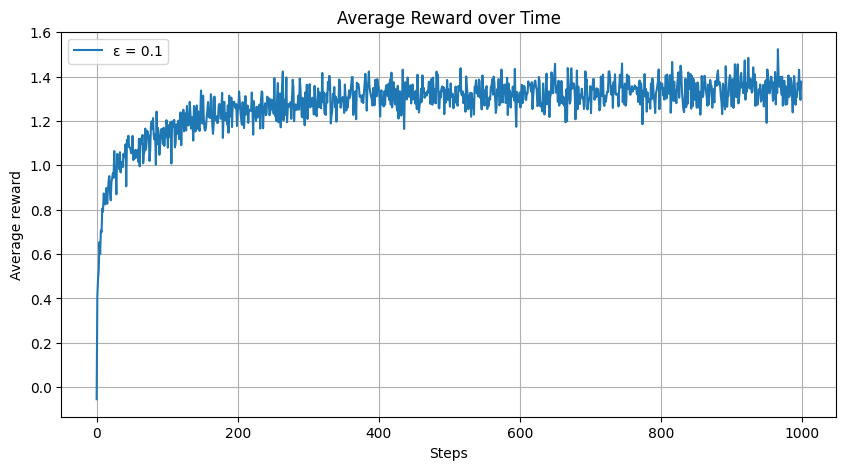

In [3]:
# Plot average reward
plt.figure(figsize=(10, 5))
plt.plot(avg_rewards, label=f"ε = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.title("Average Reward over Time")
plt.legend()
plt.grid(True)
plt.show()


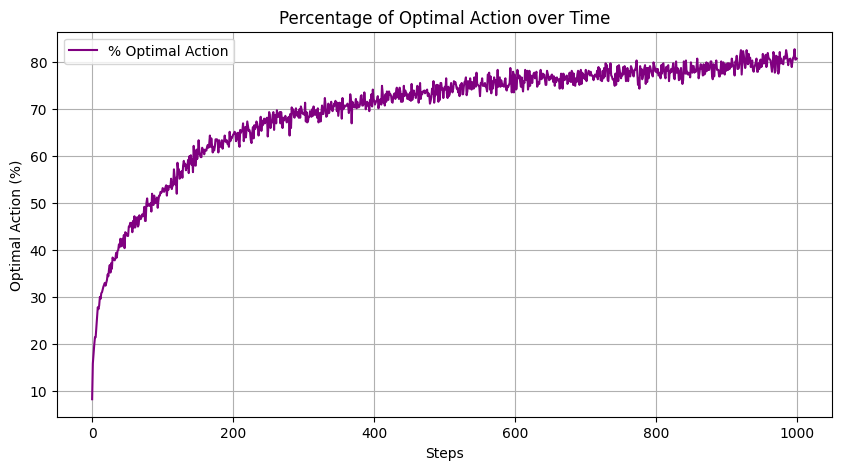

In [4]:
# Plot % optimal action
plt.figure(figsize=(10, 5))
plt.plot(optimal_action_percent, label="% Optimal Action", color="purple")
plt.xlabel("Steps")
plt.ylabel("Optimal Action (%)")
plt.title("Percentage of Optimal Action over Time")
plt.legend()
plt.grid(True)
plt.show()
